In [ ]:
#Kathrin Fischer
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import yt
from unyt import cm, s, erg
from tqdm import tqdm
import pickle
from astropy import units as u, constants  as cc

pc   = cc.pc.cgs.value
kB   = cc.k_B.cgs.value
Msun = cc.M_sun.cgs.value
G    = cc.G.cgs.value
Myr  = u.Myr.in_units("s")

In [2]:
file_path = "data/SILCC_hdf5_plt_cnt_1140-r0080_RC-data.pkl"

with open(file_path, "rb") as f:
    data = pickle.load(f)

print(data.keys())

dict_keys(['simtime', 'simtime_Myr', 'Column density', 'Column density ihp', 'Column density iha', 'Column density ih2', 'Halpha_RC luminosity', 'Halpha_RC flux', 'Halpha_R flux', 'Halpha_C flux', 'Fraction ihp', 'Fraction iha', 'Fraction ih2', 'total_mass', 'total_volu', 'total_Halpha_RC', 'total_Halpha_R', 'total_Halpha_C', 'file_suffix', 'filename'])


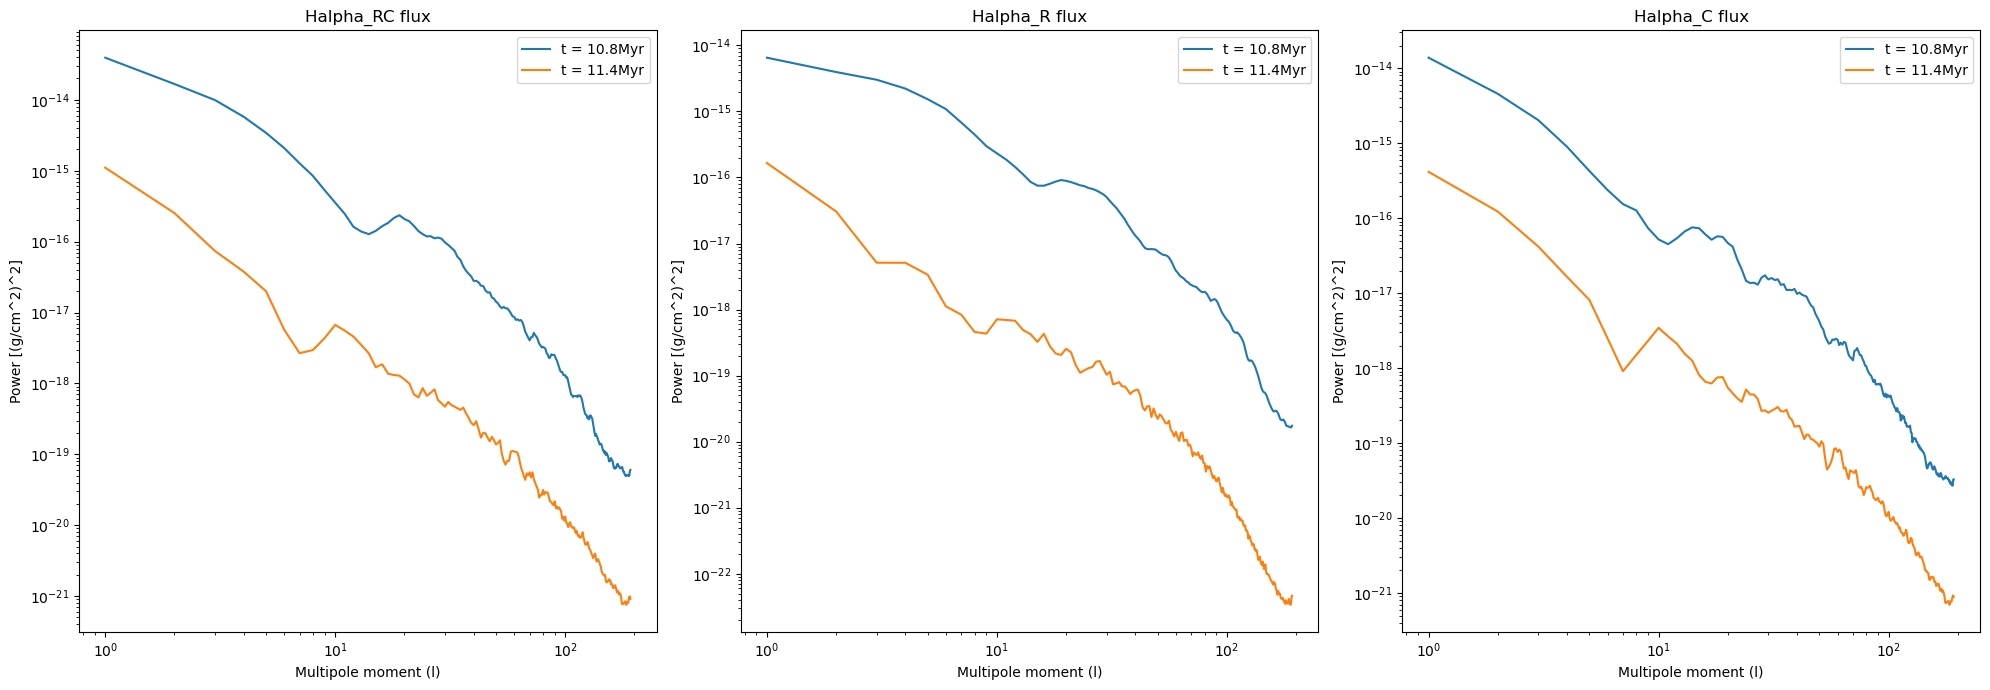

In [3]:
#
keys = ['Halpha_RC flux', 'Halpha_R flux', 'Halpha_C flux']
names = ["10.8Myr", "11.4Myr"]
units = ['(g/cm^2)^2', '(g/cm^2)^2', '(g/cm^2)^2', '(g/cm^2)^2', '(erg/s)^2', '(erg/s/cm^2)^2']
file_list = ["data/SILCC_hdf5_plt_cnt_1080-r0080_RC-data.pkl", "data/SILCC_hdf5_plt_cnt_1140-r0080_RC-data.pkl"]

fig, axs = plt.subplots(1, 3, figsize=(20, 7))
axs = axs.ravel() 

#for i, key in enumerate(keys):
for i, (key, unit) in enumerate(zip(keys, units)):
    ax = axs[i]
    
    for file, name in zip(file_list, names):
   # for file in file_list:
        with open(file, "rb") as f:
            data = pickle.load(f)
        
        dat = data[key]
        ps = hp.sphtfunc.anafast(dat)
        
        ax.loglog(np.arange(1, len(ps) + 1), ps, label=f't = {name}')
    
    ax.set_xlabel("Multipole moment (l)")
    ax.set_ylabel(f"Power [{unit}]")
    ax.set_title(f"{key}")
    ax.legend()

plt.tight_layout()
plt.savefig(f"anafast_RC.pdf", dpi=300, bbox_inches="tight")
plt.show()

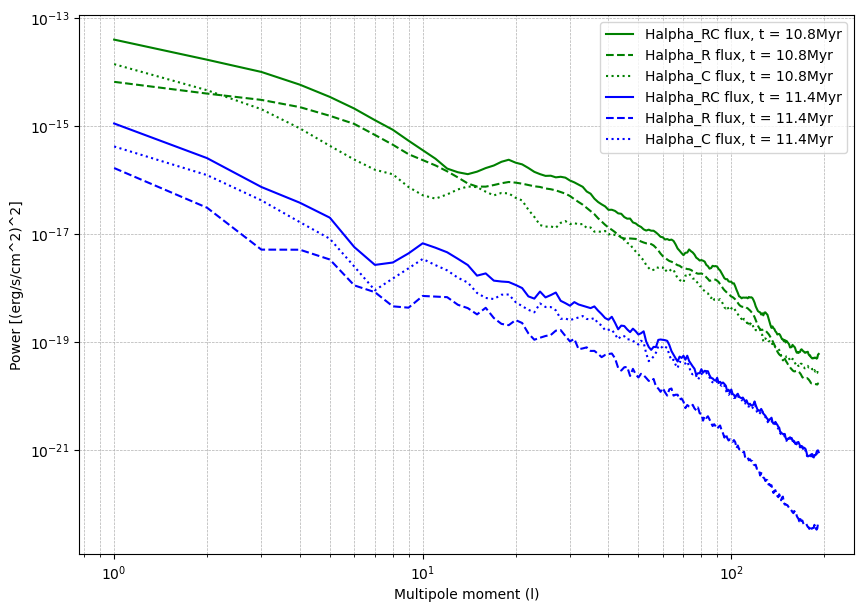

In [4]:
keys = ['Halpha_RC flux', 'Halpha_R flux', 'Halpha_C flux']
labels = ["Halpha_RC flux", "Halpha_R flux", "Halpha_C flux"] 
colors = ["green", "blue"]
linestyles = ["-", "--", ":"]  
names = ["10.8Myr", "11.4Myr"]
units = '(erg/s/cm^2)^2' 
file_list = ["data/SILCC_hdf5_plt_cnt_1080-r0080_RC-data.pkl", "data/SILCC_hdf5_plt_cnt_1140-r0080_RC-data.pkl"]

plt.figure(figsize=(10, 7))

for file, name, color in zip(file_list, names, colors):
    with open(file, "rb") as f:
        data = pickle.load(f)

    for key, linestyle in zip(keys, linestyles):
        ps = hp.sphtfunc.anafast(data[key])
        plt.loglog(np.arange(1, len(ps) + 1), ps, linestyle=linestyle, color=color, label=f'{key}, t = {name}')

plt.xlabel("Multipole moment (l)")
plt.ylabel(f"Power [{units}]")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.savefig("anafast_comparison.pdf", dpi=300, bbox_inches="tight")
plt.show()
